In [1]:
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### <div class='info-circle alert alert-block alert-info'>National Migration Data</div>
- 2020-01-01 to 2020-03-15

In [4]:
folder = 'Data'
file_path = os.path.join(folder, 'country_flow.csv')
flow_df = pd.read_csv(file_path)

flow_df['date2020'] = flow_df['date2020'].astype(str)
flow_df['date2019'] = flow_df['date2019'].astype(str)

In [5]:
flow_df.head()

,date2020,date2019,migration_index_2020,migration_index_2019
0,20200101,20190112,266.872061,353.709277
1,20200102,20190113,251.204328,312.979594
2,20200103,20190114,397.885122,333.740315
3,20200104,20190115,448.879936,304.686490
4,20200105,20190116,420.753010,311.832245


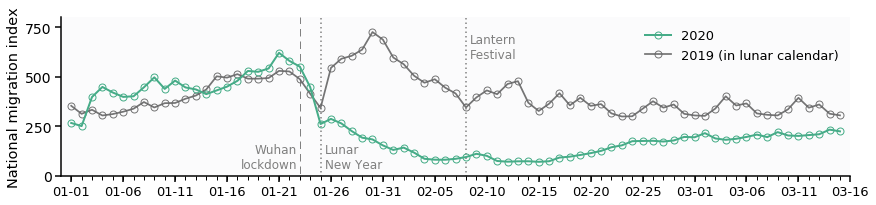

In [6]:

plot_df = flow_df.copy()

# fig, ax = plt.subplots(figsize=(12, 3))
fig, ax = plt.subplots(figsize=(12, 2.75))

ax.patch.set_alpha(0.015)
ax.set_facecolor('#2b3679')


text_color = '#46ac88'


marker_size = 7

# 2020
# --------------------
x = plot_df['date2020']
y = plot_df['migration_index_2020']

ax.plot(x, y, '-o', 
        color=text_color, 
        linewidth=2, 
        markersize=marker_size,
        clip_on=False, 
        markeredgecolor=text_color, 
        markeredgewidth=1,
        markerfacecolor='None',
        label='2020', 
#         alpha=0.9,
        zorder=100,
       )


# 2019
# --------------------
x = plot_df['date2020']
y = plot_df['migration_index_2019']

ax.plot(x, y, '-o', 
        color='#666666', 
        linewidth=1.75, 
        markersize=marker_size,
        clip_on=False, 
        # markeredgecolor='slategrey', 
        markeredgecolor='#666666', 
        markeredgewidth=1,
        markerfacecolor='None',
        label='2019 (in lunar calendar)', 
        alpha=0.9,
        zorder=90,
       )



ymin=-50
ymax = 800
line_style = (0, (7.5, 5))
ax.vlines(x=list(x).index('20200123'), ymin=ymin, ymax=ymax, linestyles=line_style, linewidth=1, color='grey')
ax.text(x=list(x).index('20200123')-0.25, y=ymax/20, s='Wuhan\nlockdown', fontsize=12, ha='right', color='grey')

line_style = (0, (1, 2))
ax.vlines(x=list(x).index('20200125'), ymin=ymin, ymax=ymax, linestyles=line_style, linewidth=1.5, color='grey')
ax.text(x=list(x).index('20200125')+0.4, y=ymax/20, s='Lunar\nNew Year', fontsize=12, ha='left', color='grey')

line_style = (0, (1, 2))
ax.vlines(x=list(x).index('20200208'), ymin=ymin, ymax=ymax, linestyles=line_style, linewidth=1.5, color='grey')
ax.text(x=list(x).index('20200208')+0.4, y=ymax/1.35, s='Lantern\nFestival', fontsize=12, ha='left', color='grey')


N = len(x)

every_nth = 1
locs = range(0, N, every_nth)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

every_nth = 5
locs = range(0, N, every_nth)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))


locs = range(0, 800, 250)
ax.yaxis.set_major_locator(ticker.FixedLocator(locs))


ticks = list(x)
ticks = list(x.str[-4:])
# ticks.insert(0, '')
ticks.append('0316')
ticks = [t[:2]+'-'+t[-2:] for t in ticks]
# string date
# ticks = list(plot_df['date2020_str'])
# ticks.append(pd.to_datetime('20200316').strftime('%b %d'))
plt.xticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='center',
           # va = 'center',
           position=(0, 0)
           # rotation_mode="anchor"
          )


real_legend = plt.legend(numpoints=1, fontsize=13, frameon=False, loc='best')


# ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('National migration index', fontsize=14.5)


border_width = 1.5
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=3, labelsize=13, length=6, width=1.5, direction='out')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=3, labelsize=14, length=6, width=1.5, direction='out')
ax.tick_params(axis='both', which='minor', top=False, right=False, length=3.5,  width=1, direction='out')


plt.xlim(-1, 75)
plt.ylim(0, 800)


plt.tight_layout(pad=0.1)
# plt.tight_layout(pad=0.1)
out_dir = 'Outputs'
# plt.savefig(os.path.join(out_dir, 'fig4-national_migration_2020_vs_2019.pdf'), pad_inches=0.01, bbox_inches='tight')


### <div class='info-circle alert alert-block alert-info'>Mobility Netork over Time</div>
- 2020-01-01 to 2020-03-15

In [7]:
net_df = pd.read_csv('Data/mobility_network_over_time.csv')
net_df['date'] = net_df['date'].astype(str)

In [8]:
net_df.shape

(75, 3)

In [9]:
net_df.head()

,date,average_degree,average_path_length
0,20200101,274.092896,0.940718
1,20200102,280.377049,0.807963
2,20200103,281.650273,0.587673
3,20200104,284.021858,0.522031
4,20200105,283.808743,0.534080


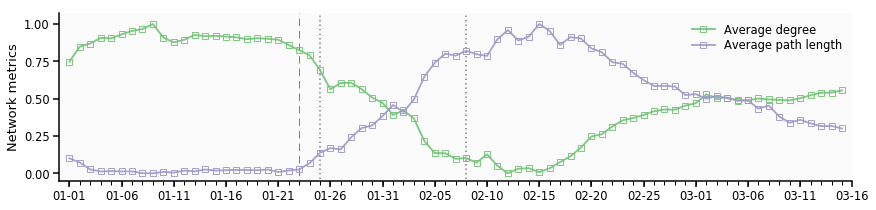

In [10]:
fig, ax = plt.subplots(figsize=(12, 2.75))

plot_df = net_df.copy()

marker_size=5.5

ax.patch.set_alpha(0.015)
ax.set_facecolor('#2b3679')


# -----------
col = 'average_degree'
x = plot_df['date']
y = plot_df[col]

text_color = '#74c476'
# text_color = '#46ac88'


# normlize?
norm_max = plot_df[col].max()
norm_min = plot_df[col].min()
plot_df[col] = plot_df[col].map(lambda x: (x-norm_min)/(norm_max-norm_min))

x = plot_df['date']
y = plot_df[col]

ax.plot(x, y, '-s', 
        color=text_color, 
        linewidth=1.9, 
        markersize=marker_size,
        clip_on=False, 
        markeredgecolor=text_color, 
        markeredgewidth=1,
        markerfacecolor='None',
        label='Average degree', 
        alpha=0.9,
        zorder=100,
       )


# -----------
col = 'average_path_length'
x = plot_df['date']
y = plot_df[col]

text_color = '#9e9ac8'


# normlize?
norm_max = plot_df[col].max()
norm_min = plot_df[col].min()
plot_df[col] = plot_df[col].map(lambda x: (x-norm_min)/(norm_max-norm_min))

x = plot_df['date']
y = plot_df[col]

ax.plot(x, y, '-s', 
        color=text_color, 
        linewidth=1.85, 
        markersize=marker_size,
        clip_on=False, 
        markeredgecolor=text_color, 
        markeredgewidth=1,
        markerfacecolor='None',
        # label='Average shortest path length', 
        label='Average path length', 
        alpha=0.9,
        zorder=100,
       )

# -----------


ymin=-0.1
ymax=1.1

line_style = (0, (7.5, 5))
ax.vlines(x=list(x).index('20200123'), ymin=ymin, ymax=ymax, linestyles=line_style, linewidth=1, color='grey')
# ax.text(x=list(x).index('20200123')-0.25, y=0.08, s='Wuhan\nlockdown', fontsize=12, ha='right', color='dodgerblue')

line_style = (0, (1, 2))
ax.vlines(x=list(x).index('20200125'), ymin=ymin, ymax=ymax, linestyles=line_style, linewidth=1.5, color='grey')
# ax.text(x=list(x).index('20200125')+0.4, y=0.375, s='Lunar\nNew Year', fontsize=12, ha='left', color='dodgerblue')

line_style = (0, (1, 2))
ax.vlines(x=list(x).index('20200208'), ymin=ymin, ymax=ymax, linestyles=line_style, linewidth=1.5, color='grey')
# ax.text(x=list(x).index('20200208')+0.4, y=0.375, s='Lantern\nFestival', fontsize=12, ha='left', color='dodgerblue')



N = len(x)

every_nth = 1
locs = range(0, N, every_nth)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

every_nth = 5
locs = range(0, N, every_nth)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))


locs = range(0, 150, 25)
locs = [i/100.0 for i in locs]
ax.yaxis.set_major_locator(ticker.FixedLocator(locs))


ticks = list(x)
ticks = list(x.str[-4:])
# ticks.insert(0, '')
ticks.append('0316')
ticks = [t[:2]+'-'+t[-2:] for t in ticks]
# string date
plt.xticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='center',
           # va = 'center',
           position=(0, 0)
           # rotation_mode="anchor"
          )


real_legend = ax.legend(numpoints=1, fontsize=11.5,
                        markerscale=1.25,
                        labelspacing=0.25,
                        frameon=False, loc='best')


# ax.set_xlabel('Date', fontsize=13)
# ax.set_ylabel('Metrics (normalized)', fontsize=13)
ax.set_ylabel('Network metrics', fontsize=13)



border_width = 1.5
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=3, labelsize=11.5, length=6, width=1.5, direction='out')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=3, labelsize=11.5, length=6, width=1.5, direction='out')
ax.tick_params(axis='both', which='minor', top=False, right=False, length=3.5,  width=1, direction='out')



ax.set_xlim(-1, 75)
ax.set_ylim(-0.05, 1.075)


# plt.tight_layout(pad=0.5)
plt.tight_layout(pad=0.1)
out_dir = 'Outputs'

# plt.savefig(os.path.join(out_dir, 'fig4-mobility_network_change.pdf'), pad_inches=0.01, bbox_inches='tight')
